# WINTER PREDICTOR
Uses the "winter_predictor" oriented-object modules

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from winter_predictor import Predictor, StationPrediction

In [2]:
import numpy as np

# PART 1 : GET PREDICTORS

The **SAME** predictor set will then be used for any target station to predict.

In [3]:
PRED = Predictor()

In [4]:
PRED.getPredictorsDF(predi='sept_oct')

In [5]:
PRED.X_df.head()

,PC1_z70_9,PC2_z70_9,PC3_z70_9,PC1_ci_9,PC2_ci_9,PC3_ci_9,PC1_sst_9,PC2_sst_9,PC3_sst_9,PC1_sstna_9,...,PC1_ci_10,PC2_ci_10,PC3_ci_10,PC1_sst_10,PC2_sst_10,PC3_sst_10,PC1_sstna_10,PC2_sstna_10,PC3_sstna_10,Nino_10
0,18052.863098,2794.361256,-2116.244324,3.275356,0.726252,0.469136,5.510229,4.191462,-2.508625,-6.904258,...,2.107157,0.696275,-0.698663,6.400690,0.196194,-5.125187,-1.838503,7.724172,-5.279922,-0.224291
1,-5385.037935,9731.932180,5869.074857,0.216875,0.721824,0.349584,-3.276851,0.193917,1.794615,-1.236142,...,0.324121,0.532795,-0.254012,-4.633502,2.374289,-0.825944,-0.797750,7.534880,-4.653458,0.163475
2,19738.603692,-8462.518693,1660.035809,-0.464925,1.897943,-0.513135,-4.597645,0.881733,-2.095681,-7.557543,...,0.672014,0.872678,0.095421,-5.923799,3.085043,-0.241748,-7.703222,3.112256,-6.053164,0.101910
3,-14501.642267,8704.270136,-4936.915557,-0.703011,1.672008,0.392651,19.873730,8.919881,-1.493089,4.321195,...,-0.852150,1.053907,0.983091,27.126986,9.293802,-5.174670,8.272707,-0.886065,6.863974,-1.708226
4,-5763.134157,2431.342615,13907.629124,1.215207,0.516179,1.162860,2.415016,-5.933925,-14.431840,7.626936,...,1.591010,-0.325249,0.142318,-3.253798,-5.828133,-9.326420,4.835679,-2.763278,0.331844,0.772114


In [6]:
PRED.X_df.columns

Index(['PC1_z70_9', 'PC2_z70_9', 'PC3_z70_9', 'PC1_ci_9', 'PC2_ci_9',
       'PC3_ci_9', 'PC1_sst_9', 'PC2_sst_9', 'PC3_sst_9', 'PC1_sstna_9',
       'PC2_sstna_9', 'PC3_sstna_9', 'wyear', 'Nino_9', 'PC1_z70_10',
       'PC2_z70_10', 'PC3_z70_10', 'PC1_ci_10', 'PC2_ci_10', 'PC3_ci_10',
       'PC1_sst_10', 'PC2_sst_10', 'PC3_sst_10', 'PC1_sstna_10',
       'PC2_sstna_10', 'PC3_sstna_10', 'Nino_10'],
      dtype='object')

# PART 2 : GET STATION DATA

In [7]:
# Which Station id ?
import pymongo
import pandas as pd
mongo_host_local = 'mongodb://localhost:27017/'
mg = pymongo.MongoClient(mongo_host_local)
db = mg.GHCN

this_country = 'SWITZERLAND'

db.stations.distinct('country')
sta_df = pd.DataFrame(list(db.stations.find(filter={'country': this_country})))
sta_df.head()

,_id,station_id,loc,country,country_id,wmo_id,elev,name,landcover,popclass
0,5abe7d8823c8cceb0c3f9563,64606610000,"{'type': 'Point', 'coordinates': [6.95, 46.82]}",SWITZERLAND,646,6610,491.0,PAYERNE,WARM FOR./FIELD,B
1,5abe7d8823c8cceb0c3f9565,64606630001,"{'type': 'Point', 'coordinates': [7.4, 47.0]}",SWITZERLAND,646,6630,-999.0,BERN SWITZERLAN,WARM CROPS,B
2,5abe7d8823c8cceb0c3f9567,64606642001,"{'type': 'Point', 'coordinates': [7.6, 47.6]}",SWITZERLAND,646,6642,318.0,BASEL/BINNINGEN SWITZERLAN,COOL CROPS,C
3,5abe7d8823c8cceb0c3f9569,64606660000,"{'type': 'Point', 'coordinates': [8.57, 47.38]}",SWITZERLAND,646,6660,569.0,ZURICH (TOWN/,WARM MIXED,C
4,5abe7d8823c8cceb0c3f956b,64606680000,"{'type': 'Point', 'coordinates': [9.35, 47.25]}",SWITZERLAND,646,6680,2500.0,SAENTIS,WARM CROPS,A


In [8]:
STA = StationPrediction(station_id=64606660000, 
                        target_months=['12', '1'],
                        X_df=PRED.X_df)

In [9]:
STA.station_name

'ZURICH (TOWN/'

In [10]:
STA.metadata

{'_id': ObjectId('5abe7d8823c8cceb0c3f9569'),
 'station_id': 64606660000,
 'loc': {'type': 'Point', 'coordinates': [8.57, 47.38]},
 'country': 'SWITZERLAND',
 'country_id': 646,
 'wmo_id': 6660,
 'elev': 569.0,
 'name': 'ZURICH (TOWN/',
 'landcover': 'WARM MIXED',
 'popclass': 'C'}

In [11]:
STA.queryData()
STA.data_df.tail()

,wyear,64606660000
34,2014,2.40
35,2015,2.50
36,2016,3.60
37,2017,-1.15
38,2018,3.05


In [12]:
STA.getAnomalies()
STA.anom_df.tail()

,wyear,x,xbar,anom
34,2014,2.40,1.512753,0.887247
35,2015,2.50,1.540526,0.959474
36,2016,3.60,1.568300,2.031700
37,2017,-1.15,1.596073,-2.746073
38,2018,3.05,1.623846,1.426154


# PART 3 : FIT ANOMALIES

In [13]:
STA.fitAnomalies(X_df=PRED.X_df)

/home/dmasson/CloudStation/code/winter_predictor/winter_predictor.py:427: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = dat_df[predNames].as_matrix()
/home/dmasson/anaconda3/envs/wpred/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005693720792479429, tolerance: 0.004797124440656293
  positive)
/home/dmasson/anaconda3/envs/wpred/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005179419653534634, tolerance: 0.004797124440656293
  positive)
/home/dmasson/anaconda3/envs/wpred/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

In [14]:
res = dict({'R2': STA.R2, 
            'nyears_used': STA.nyears_used})
print(res)

{'R2': 0.2004061939784222, 'nyears_used': 38}


In [15]:
STA.importance_df

,pred,coef,absCoef
0,PC1_z70_9,-0.079726,0.079726
1,PC2_z70_10,-0.044593,0.044593
2,PC1_ci_10,-0.217025,0.217025
3,PC3_ci_10,0.158011,0.158011
4,PC1_sst_10,0.224107,0.224107


# PART 4 : PREDICT FUTURE ANOMALIES

In [16]:
wyear_new = 2017
newX_df = PRED.X_df.query('wyear==@wyear_new') # for instance
STA.predictFutureAnomalies(newX_df)
pred_anomaly = STA.predictedAnomaly # array([-0.03753036])
pred_anomaly

/home/dmasson/CloudStation/code/winter_predictor/winter_predictor.py:490: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  newX_0 = newX_df[predNames].as_matrix()


array([-0.03753036])

# PART 5 : EXTREME ANOMALY ?

In [29]:
# Long-term trend
wyear_n = np.array(wyear_new).reshape(1, -1)
ltt = STA.detrend_fit
ltt_fit = ltt.predict(wyear_n)[0]
ltt_fit

array([1.59607287])

In [30]:
# Predicted wyear value :
T_pred = pred_anomaly + ltt_fit
T_pred

array([1.55854251])

In [31]:
# Anomaly as defined by SwissRe :
SwissRe_df = STA.anom_df.tail(10) # take only the last 10 years
SwissRe_ltt = np.nanmean(SwissRe_df.x.values)
SwissRe_anom = T_pred-SwissRe_ltt
SwissRe_anom

array([0.19854251])

In [32]:
SwissRe_df = SwissRe_df.assign(anom_SwissRe=SwissRe_df.x-SwissRe_ltt)
SwissRe_df

,wyear,x,xbar,anom,anom_SwissRe
29,2009,-0.70,1.373887,-2.073887,-2.06
30,2010,-0.40,1.401660,-1.801660,-1.76
31,2011,0.20,1.429433,-1.229433,-1.16
32,2012,2.80,1.457206,1.342794,1.44
33,2013,1.30,1.484980,-0.184980,-0.06
34,2014,2.40,1.512753,0.887247,1.04
35,2015,2.50,1.540526,0.959474,1.14
36,2016,3.60,1.568300,2.031700,2.24
37,2017,-1.15,1.596073,-2.746073,-2.51
38,2018,3.05,1.623846,1.426154,1.69


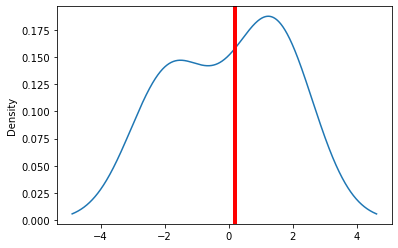

In [33]:
# Fit Normal distribution
from scipy.stats import norm
mu, std = norm.fit(SwissRe_df.anom_SwissRe)
SwissRe_df['anom_SwissRe'].plot.density()
plt.axvline(SwissRe_anom,linewidth=4, color='r')

In [34]:
quantl = norm.cdf(0, loc=SwissRe_anom, scale=std).ravel()
quantl

array([0.45219341])